# Heatmap with gmaps

## Prerequisities: 

Install gmaps: 
```
conda install -c conda-forge gmaps
```
and acquire an API key with these [instructions](https://media.readthedocs.org/pdf/jupyter-gmaps/latest/jupyter-gmaps.pdf)

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
plt.style.use('seaborn')

In [2]:
ais = pd.read_csv('../bigdata/ais-observations-1-week-20180315.csv', parse_dates = ['timestamp'])
ais = ais.sort_values(by=['timestamp'])

,timestamp,mmsi,lon,lat,sog,cog,heading
2263440,2018-03-14 23:59:59.064,276776000,21.473023,61.126297,0.0,63.7,323
2263441,2018-03-14 23:59:59.066,230992260,21.472692,61.127272,0.0,268.4,184
2263442,2018-03-14 23:59:59.067,230992660,28.877223,61.877110,0.0,0.0,511
2263443,2018-03-14 23:59:59.074,230115340,21.464200,61.594145,0.0,198.4,264
2263444,2018-03-14 23:59:59.089,230052840,28.386033,61.608773,0.0,1.6,1


In [3]:
import gmaps
import gmaps.datasets
gmaps.configure(api_key="...")

In [47]:
df = ais[0:500000]
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
df = df.drop(['lon', 'lat'], axis=1)
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

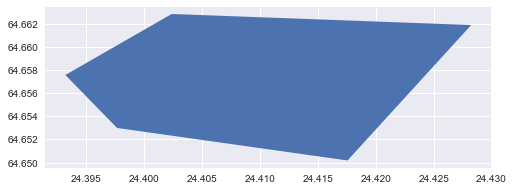

In [48]:
raahe_port = gpd.read_file('../data/raahe_poly.shp')
raahe_port.plot()

In [49]:
raahe_ais = gpd.sjoin(gdf, raahe_port, how='inner', op='intersects')

In [50]:
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(raahe_ais['geometry'].apply(lambda p: [p.y, p.x])))
fig

A Jupyter Widget